# **Анализ экологических проблем - Апрель 2025**

In [7]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Обзор данных
У нас есть данные завода по производству полезного полимера.
Задача - исследовать зависимость вредных выбросов от производственных показателей. Какой этап имеет высокий риск создать повышенное содержание вредного газа.

*Таблица зависимости вредных выбросов от производственных показателей:*

In [8]:
df = pd.read_csv('проект data.csv', delimiter=',', encoding='windows-1251')
df.head(5)

,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,2021-01-28 18:00:00,67.83,92.99,474.18,76.84,97.52,49.94,361.50,252.04,97.48,...,108.65,45.59,156.67,19.08,5.92,356.05,NaN,21.48,47.03,2.0
1,2021-01-28 19:00:00,67.83,91.82,473.68,76.15,97.82,48.55,354.75,244.87,97.66,...,108.71,45.89,156.76,19.15,5.94,357.69,NaN,21.48,45.05,2.0
2,2021-01-28 20:00:00,67.83,90.65,473.17,75.46,98.12,47.15,348.00,237.70,97.85,...,108.76,46.19,156.86,19.23,5.97,359.33,NaN,21.48,43.06,2.0
3,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
4,2021-01-28 22:00:00,68.03,89.84,474.00,75.06,97.46,51.51,365.49,262.04,97.15,...,108.51,45.54,155.96,19.49,5.97,320.64,NaN,21.48,48.95,2.0


## Предобработка данных

Выведем на экран названия столбцов:

In [9]:
df.columns

Index(['DateTime', 'stage_1_output_konv_avd', 'stage_2_input_water_sum',
       'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp',
       'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_bottom_vacuum',
       'stage_2_output_top_pressure', 'stage_2_output_top_pressure_at_end',
       'stage_2_output_top_temp', 'stage_2_output_top_vacuum',
       'stage_3_input_pressure', 'stage_3_input_soft_water',
       'stage_3_input_steam', 'stage_3_output_temp_hum_steam',
       'stage_3_output_temp_top', 'stage_4_input_overheated_steam',
       'stage_4_input_polymer', 'stage_4_input_steam', 'stage_4_input_water',
       'stage_4_output_danger_gas', 'stage_4_output_dry_residue_avg',
       'stage_4_output_product', 'work_shift'],
      dtype='object')

In [12]:
df['DateTime'] = pd.to_datetime(df['DateTime'])  # Преобразование строки в datetime

Переводим столбец Datetime в тип Datetime

In [13]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DateTime                              4400 non-null   datetime64[ns]
 1   stage_1_output_konv_avd               4159 non-null   float64       
 2   stage_2_input_water_sum               4177 non-null   float64       
 3   stage_2_output_bottom_pressure        4180 non-null   float64       
 4   stage_2_output_bottom_temp            4209 non-null   float64       
 5   stage_2_output_bottom_temp_hum_steam  4223 non-null   float64       
 6   stage_2_output_bottom_vacuum          4169 non-null   float64       
 7   stage_2_output_top_pressure           4218 non-null   float64       
 8   stage_2_output_top_pressure_at_end    4226 non-null   float64       
 9   stage_2_output_top_temp               4196 non-null   float64       
 10  

### Пропуски значений
Сначала посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов pandas:

In [14]:
df.isnull().sum()

DateTime                                   0
stage_1_output_konv_avd                  241
stage_2_input_water_sum                  223
stage_2_output_bottom_pressure           220
stage_2_output_bottom_temp               191
stage_2_output_bottom_temp_hum_steam     177
stage_2_output_bottom_vacuum             231
stage_2_output_top_pressure              182
stage_2_output_top_pressure_at_end       174
stage_2_output_top_temp                  204
stage_2_output_top_vacuum                195
stage_3_input_pressure                   236
stage_3_input_soft_water                 213
stage_3_input_steam                      173
stage_3_output_temp_hum_steam            174
stage_3_output_temp_top                  230
stage_4_input_overheated_steam           169
stage_4_input_polymer                    226
stage_4_input_steam                      244
stage_4_input_water                      241
stage_4_output_danger_gas               3466
stage_4_output_dry_residue_avg           160
stage_4_ou

Посчитаем явные дубликаты в таблице одной командой:

In [15]:
df.duplicated().sum()

np.int64(0)

**stage_4_output_danger_gas** Доля опасного газа на выходе агрегата. Удалим все строки, не имеющие данных по этому столбцу

In [16]:
df = df.dropna(subset=["stage_4_output_danger_gas"]).reset_index()
df.head(5)


,index,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,3,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
1,7,2021-01-29 01:00:00,71.23,105.97,475.01,76.90,98.28,51.24,370.37,260.85,...,108.26,45.74,156.46,22.93,5.73,319.95,0.15,21.98,52.55,2.0
2,14,2021-01-29 08:00:00,68.83,106.60,471.56,76.74,NaN,49.14,359.06,248.59,...,109.49,46.10,156.18,17.95,5.73,258.98,0.13,22.58,42.99,1.0
3,20,2021-01-29 21:00:00,68.73,104.05,465.82,75.31,96.24,45.14,341.09,224.87,...,108.08,45.84,156.62,15.20,5.88,319.02,0.14,20.78,43.67,1.0
4,24,2021-01-30 01:00:00,66.03,103.28,468.38,77.53,96.48,52.44,373.44,267.24,...,109.20,45.99,156.51,18.52,5.71,297.12,0.15,21.28,47.43,1.0


In [17]:
df.describe()

,index,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
count,934.000000,934,922.000000,919.000000,916.000000,926.000000,930.000000,910.000000,930.000000,933.000000,...,932.000000,920.000000,932.000000,924.000000,908.000000,913.000000,934.000000,934.000000,934.000000,934.000000
mean,2429.627409,2022-02-04 12:42:35.460385280,69.060043,87.330033,395.151900,78.944482,98.034118,56.671484,453.195452,262.836281,...,109.579968,42.278728,153.309839,20.090119,5.340595,302.109606,0.140139,22.324218,43.576435,1.491435
min,3.000000,2021-01-28 21:00:00,52.630000,19.950000,275.720000,70.050000,79.590000,38.600000,311.580000,134.920000,...,103.600000,25.940000,144.980000,4.250000,2.740000,76.770000,0.020000,17.280000,0.710000,1.000000
25%,1155.750000,2021-11-20 14:45:00,66.080000,65.515000,348.762500,77.250000,90.882500,52.550000,404.410000,228.170000,...,108.050000,40.580000,151.990000,18.072500,4.700000,230.090000,0.110000,21.480000,29.850000,1.000000
50%,2598.000000,2022-03-07 11:00:00,69.330000,83.850000,376.485000,78.600000,96.370000,56.105000,433.120000,261.200000,...,109.095000,43.935000,153.165000,20.475000,5.305000,285.560000,0.140000,22.480000,46.695000,1.000000
75%,3727.750000,2022-07-25 05:45:00,72.030000,110.410000,451.547500,80.540000,102.880000,59.750000,480.520000,292.980000,...,110.832500,45.762500,153.702500,22.042500,6.060000,359.940000,0.167500,23.180000,54.667500,2.000000
max,4399.000000,2023-03-21 12:00:00,78.630000,229.830000,764.590000,92.550000,125.120000,122.380000,1000.750000,579.640000,...,123.500000,51.310000,157.680000,29.360000,7.930000,716.840000,0.340000,25.480000,101.300000,2.000000
std,1386.835409,NaN,3.928591,31.142072,57.794599,2.758216,8.995938,7.411261,84.347035,46.840862,...,2.725024,4.974390,1.633959,2.910832,1.071755,109.056252,0.038566,1.228748,14.746937,0.500194


In [18]:
df.isnull().sum().sort_values(ascending=False)

stage_4_input_steam                     26
stage_2_output_bottom_vacuum            24
stage_4_input_water                     21
stage_2_output_bottom_pressure          18
stage_3_input_pressure                  17
stage_2_input_water_sum                 15
stage_3_output_temp_top                 14
stage_1_output_konv_avd                 12
stage_3_input_soft_water                10
stage_2_output_top_vacuum               10
stage_4_input_polymer                   10
stage_2_output_top_temp                  9
stage_2_output_bottom_temp               8
stage_2_output_bottom_temp_hum_steam     4
stage_2_output_top_pressure              4
stage_3_output_temp_hum_steam            2
stage_4_input_overheated_steam           2
stage_3_input_steam                      1
stage_2_output_top_pressure_at_end       1
DateTime                                 0
index                                    0
stage_4_output_danger_gas                0
stage_4_output_dry_residue_avg           0
stage_4_out

<Axes: >

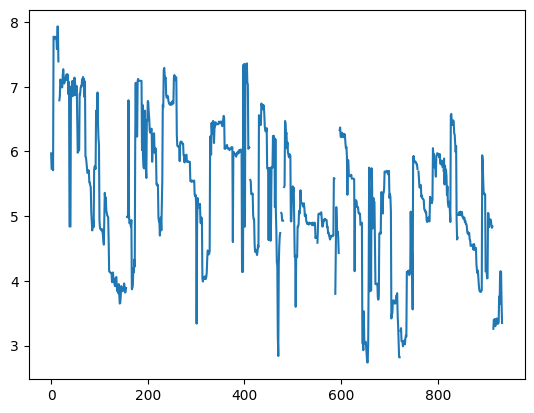

In [19]:
df.stage_4_input_steam.plot()

на графике мы видим разрывы, целесообразней пропуски заполнить интерполяцией значений 

In [20]:
df["stage_4_input_steam"] = pd.to_numeric(df["stage_4_input_steam"], errors="coerce").interpolate()

<Axes: >

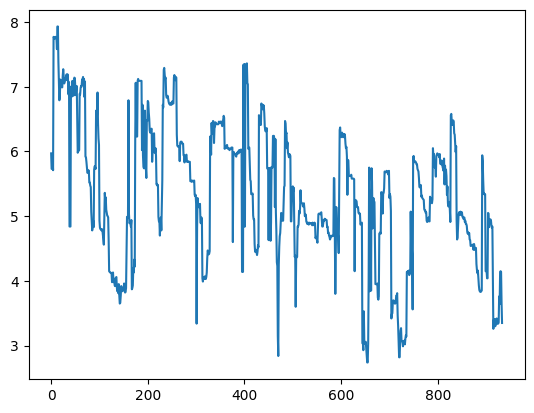

In [21]:
df.stage_4_input_steam.plot()

<Axes: >

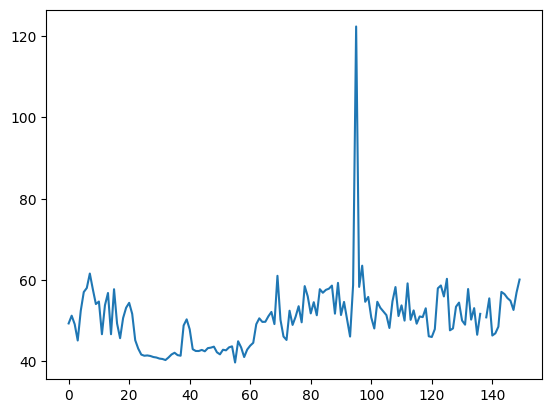

In [22]:
df.stage_2_output_bottom_vacuum.head(150).plot()

In [23]:
df["stage_2_output_bottom_vacuum"] = pd.to_numeric(df["stage_2_output_bottom_vacuum"], errors="coerce").interpolate()

<Axes: >

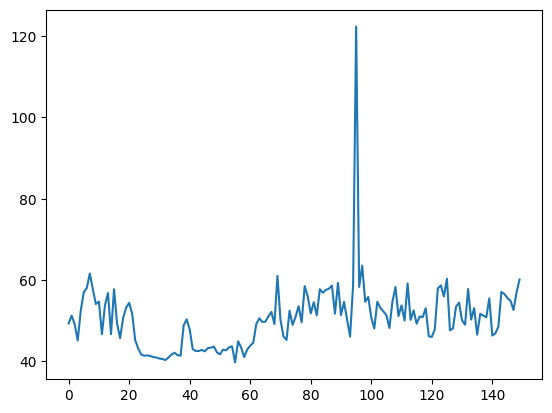

In [24]:
df.stage_2_output_bottom_vacuum.head(150).plot()

<Axes: >

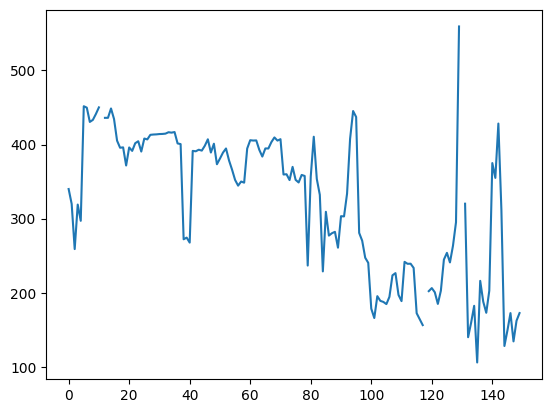

In [25]:
df.stage_4_input_water.head(150).plot()

In [26]:
df["stage_4_input_water"] = pd.to_numeric(df["stage_4_input_water"], errors="coerce").interpolate()

<Axes: >

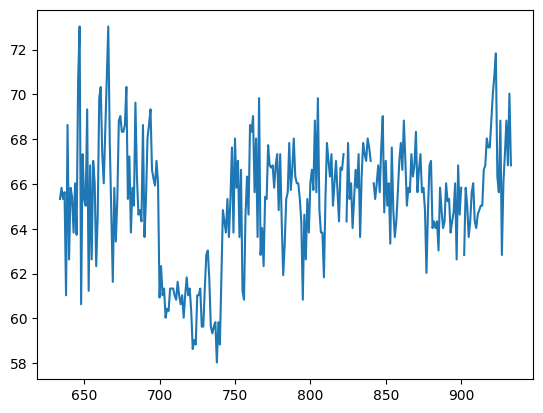

In [27]:
df.stage_1_output_konv_avd.tail(300).plot()

In [28]:
df["stage_1_output_konv_avd"] = pd.to_numeric(df["stage_1_output_konv_avd"], errors="coerce").interpolate()

<Axes: >

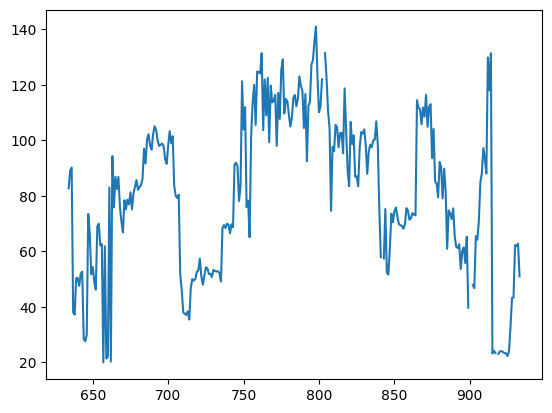

In [29]:
df.stage_2_input_water_sum.tail(300).plot()

In [30]:
df["stage_2_input_water_sum"] = pd.to_numeric(df["stage_2_input_water_sum"], errors="coerce").interpolate()

<Axes: >

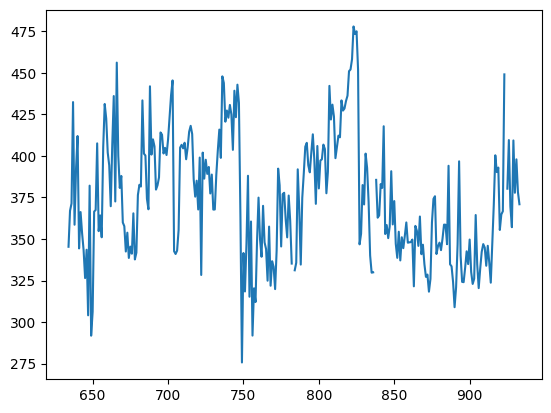

In [31]:
df.stage_2_output_bottom_pressure.tail(300).plot()

In [32]:
df["stage_2_output_bottom_pressure"] = pd.to_numeric(df["stage_2_output_bottom_pressure"], errors="coerce").interpolate()

<Axes: >

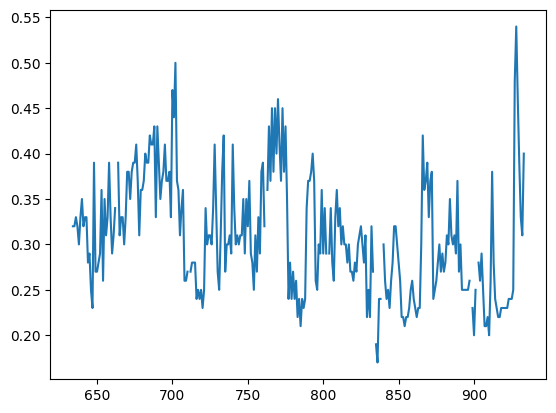

In [33]:
df.stage_3_input_pressure.tail(300).plot()

In [34]:
df["stage_3_input_pressure"] = pd.to_numeric(df["stage_3_input_pressure"], errors="coerce").interpolate()

<Axes: >

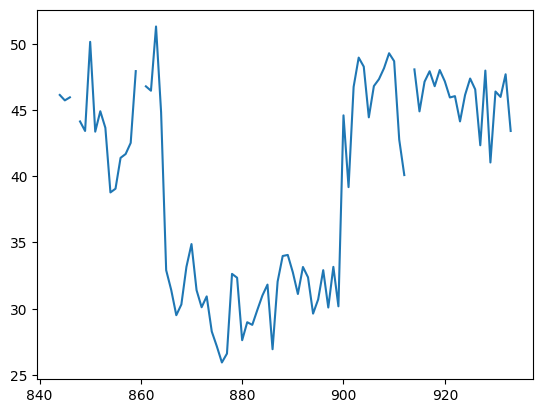

In [35]:
df.stage_3_output_temp_top.tail(90).plot()

In [36]:
df["stage_3_output_temp_top"] = pd.to_numeric(df["stage_3_output_temp_top"], errors="coerce").interpolate()

<Axes: >

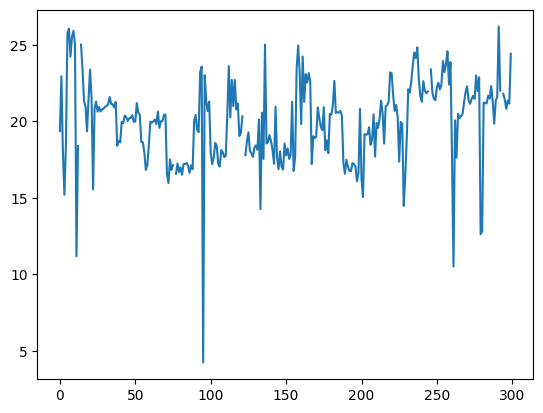

In [37]:
df.stage_4_input_polymer.head(300).plot()

In [38]:
df["stage_4_input_polymer"] = pd.to_numeric(df["stage_4_input_polymer"], errors="coerce").interpolate()

<Axes: >

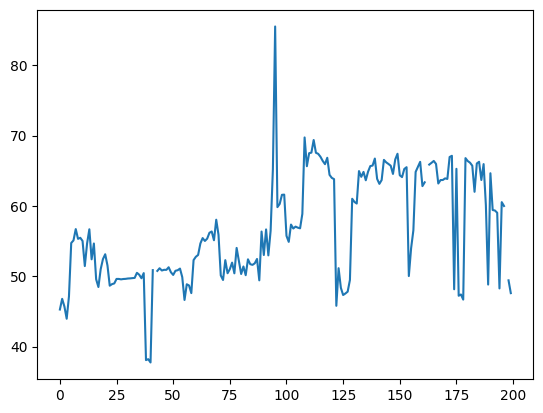

In [39]:
df.stage_2_output_top_vacuum.head(200).plot()

In [40]:
df["stage_2_output_top_vacuum"] = pd.to_numeric(df["stage_2_output_top_vacuum"], errors="coerce").interpolate()

<Axes: >

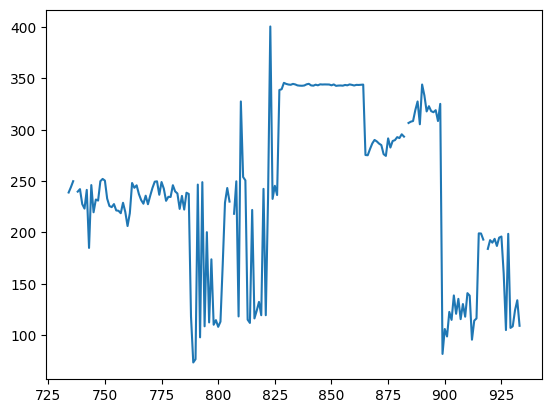

In [41]:
df.stage_3_input_soft_water.tail(200).plot()

In [51]:
df.head(50)

,index,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,3,2021-01-28 21:00:00,67.93,90.24,473.590,75.26,97.79,49.33,356.74,249.87,...,108.63,45.87,156.41,19.36,5.970,339.990,0.16,21.48,46.01,2.0
1,7,2021-01-29 01:00:00,71.23,105.97,475.010,76.90,98.28,51.24,370.37,260.85,...,108.26,45.74,156.46,22.93,5.730,319.950,0.15,21.98,52.55,2.0
2,14,2021-01-29 08:00:00,68.83,106.60,471.560,76.74,97.26,49.14,359.06,248.59,...,109.49,46.10,156.18,17.95,5.730,258.980,0.13,22.58,42.99,1.0
3,20,2021-01-29 21:00:00,68.73,104.05,465.820,75.31,96.24,45.14,341.09,224.87,...,108.08,45.84,156.62,15.20,5.880,319.020,0.14,20.78,43.67,1.0
4,24,2021-01-30 01:00:00,66.03,103.28,468.380,77.53,96.48,52.44,373.44,267.24,...,109.20,45.99,156.51,18.52,5.710,297.120,0.15,21.28,47.43,1.0
5,25,2021-01-30 21:00:00,71.63,113.98,477.330,81.34,94.94,57.05,447.76,282.51,...,110.73,46.47,157.01,25.73,7.770,451.660,0.14,22.88,53.38,1.0
6,28,2021-01-31 00:00:00,74.63,114.53,478.530,81.46,97.90,58.06,450.41,289.65,...,110.15,47.05,156.51,26.05,7.755,449.780,0.18,22.88,55.43,1.0
7,37,2021-01-31 09:00:00,69.43,114.36,476.290,82.74,93.56,61.61,462.61,307.47,...,109.57,45.63,156.72,24.22,7.740,430.510,0.17,23.28,57.19,2.0
8,41,2021-01-31 13:00:00,70.43,114.75,474.330,81.77,94.83,57.72,450.86,286.88,...,110.03,46.17,156.64,25.49,7.750,433.250,0.19,22.98,52.69,2.0
9,42,2021-02-01 09:00:00,70.93,122.32,473.110,81.52,99.05,54.10,454.46,268.94,...,108.99,47.30,156.65,25.90,7.770,441.170,0.19,23.28,56.73,2.0


In [52]:
df.isnull().sum().sort_values(ascending=False)

index                                   0
DateTime                                0
stage_1_output_konv_avd                 0
stage_2_input_water_sum                 0
stage_2_output_bottom_pressure          0
stage_2_output_bottom_temp              0
stage_2_output_bottom_temp_hum_steam    0
stage_2_output_bottom_vacuum            0
stage_2_output_top_pressure             0
stage_2_output_top_pressure_at_end      0
stage_2_output_top_temp                 0
stage_2_output_top_vacuum               0
stage_3_input_pressure                  0
stage_3_input_soft_water                0
stage_3_input_steam                     0
stage_3_output_temp_hum_steam           0
stage_3_output_temp_top                 0
stage_4_input_overheated_steam          0
stage_4_input_polymer                   0
stage_4_input_steam                     0
stage_4_input_water                     0
stage_4_output_danger_gas               0
stage_4_output_dry_residue_avg          0
stage_4_output_product            

Осталось 934 строки, пропусков по столбцу stage_4_output_danger_gas нет

In [53]:
df.describe()

,index,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
count,934.000000,934,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,...,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,2429.627409,2022-02-04 12:42:35.460385280,69.081071,87.304304,395.493051,78.951890,98.039176,56.706408,453.100300,262.883640,...,109.578699,42.311852,153.309486,20.092505,5.340219,302.884925,0.140139,22.324218,43.576435,1.491435
min,3.000000,2021-01-28 21:00:00,52.630000,19.950000,275.720000,70.050000,79.590000,38.600000,311.580000,134.920000,...,103.600000,25.940000,144.980000,4.250000,2.740000,76.770000,0.020000,17.280000,0.710000,1.000000
25%,1155.750000,2021-11-20 14:45:00,66.230000,65.427500,349.067500,77.252500,90.882500,52.605000,404.342500,228.170000,...,108.050000,40.602500,151.990000,18.082500,4.700000,231.195000,0.110000,21.480000,29.850000,1.000000
50%,2598.000000,2022-03-07 11:00:00,69.430000,83.850000,377.060000,78.615000,96.425000,56.170000,433.120000,261.440000,...,109.095000,43.940000,153.165000,20.480000,5.300000,285.765000,0.140000,22.480000,46.695000,1.000000
75%,3727.750000,2022-07-25 05:45:00,72.030000,110.682500,452.265000,80.547500,102.922500,59.750000,480.520000,293.047500,...,110.827500,45.760000,153.700000,22.022500,6.060000,359.852500,0.167500,23.180000,54.667500,2.000000
max,4399.000000,2023-03-21 12:00:00,78.630000,229.830000,764.590000,92.550000,125.120000,122.380000,1000.750000,579.640000,...,123.500000,51.310000,157.680000,29.360000,7.930000,716.840000,0.340000,25.480000,101.300000,2.000000
std,1386.835409,NaN,3.928596,31.348165,57.852693,2.751638,8.993602,7.372985,84.252044,46.838121,...,2.722772,4.950260,1.632230,2.910708,1.068374,109.559620,0.038566,1.228748,14.746937,0.500194


In [27]:
# df.sort_values(by='stage_4_output_danger_gas', ascending=False)

,index,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
408,2215,2022-02-02 09:00:00,74.23,115.33,347.43,77.83,107.44,57.02,412.74,257.30,...,108.33,44.79,153.55,19.73,6.04,255.95,0.34,22.28,49.20,1.0
143,690,2021-03-28 20:00:00,67.83,77.39,353.02,77.52,104.40,57.09,433.15,314.94,...,110.52,37.73,155.15,20.95,3.66,311.93,0.31,21.68,59.08,2.0
183,876,2021-04-15 09:00:00,67.83,186.46,358.52,78.07,90.06,58.78,375.67,267.27,...,111.42,42.27,154.79,20.54,7.09,413.72,0.31,23.48,60.74,1.0
403,2194,2022-02-01 12:00:00,73.03,113.16,344.03,77.63,115.46,53.94,411.55,227.46,...,109.23,42.29,153.51,25.16,7.32,306.01,0.27,21.28,52.79,1.0
176,842,2021-04-13 20:00:00,69.03,109.28,485.49,76.73,99.68,55.48,330.14,515.07,...,110.89,47.04,154.70,18.11,6.24,349.29,0.26,23.68,54.78,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,545,2021-03-17 13:00:00,69.73,123.44,471.62,79.52,112.51,59.19,430.65,311.34,...,110.99,38.35,156.69,23.60,5.24,239.12,0.04,22.58,68.85,2.0
280,1443,2021-12-02 21:00:00,69.33,81.44,335.17,76.88,111.69,52.72,409.35,224.87,...,108.20,45.70,153.30,12.81,5.95,327.66,0.04,22.28,27.83,2.0
648,3459,2022-06-29 08:00:00,60.63,66.45,382.12,78.60,87.30,63.14,531.40,328.39,...,110.24,42.59,151.53,15.74,3.05,84.42,0.04,21.98,47.83,1.0
296,1529,2021-12-06 21:00:00,70.63,80.59,344.72,77.07,103.36,55.28,426.16,255.73,...,108.97,46.56,153.07,20.81,5.55,291.06,0.04,21.98,47.85,2.0


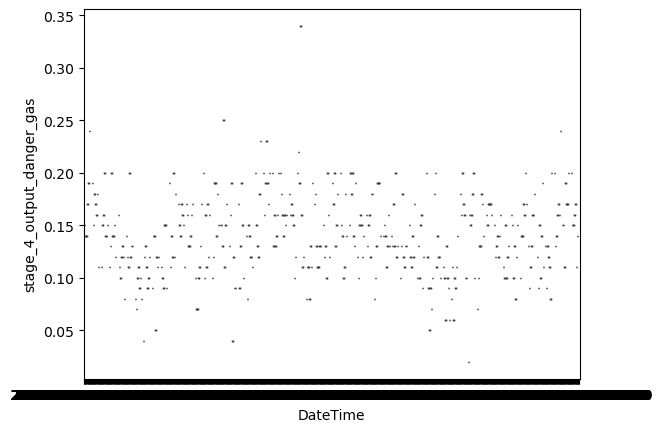

In [19]:
bp = sns.boxplot(x='DateTime', y='stage_4_output_danger_gas', data=df)
#plt.setp(bp.get_xticklabels(), rotation=0)
plt.show()

<Axes: >

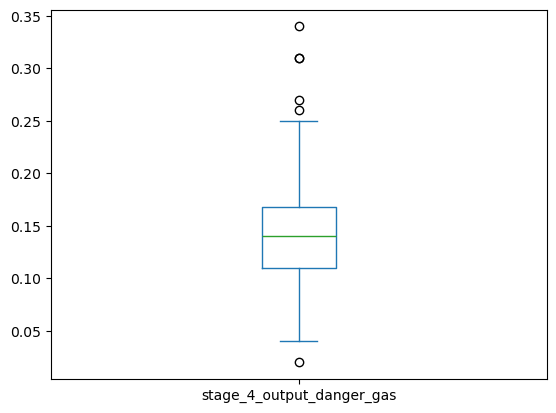

In [20]:
df['stage_4_output_danger_gas'].plot(kind='box')

In [21]:
pd.DataFrame(df.corr(method='pearson')["stage_4_output_danger_gas"]).style.background_gradient(cmap='cividis')

,stage_4_output_danger_gas
index,-0.058681
DateTime,-0.030006
stage_1_output_konv_avd,0.112872
stage_2_input_water_sum,0.006326
stage_2_output_bottom_pressure,0.003808
stage_2_output_bottom_temp,-0.059606
stage_2_output_bottom_temp_hum_steam,-0.079579
stage_2_output_bottom_vacuum,0.055478
stage_2_output_top_pressure,-0.081201
stage_2_output_top_pressure_at_end,0.055184


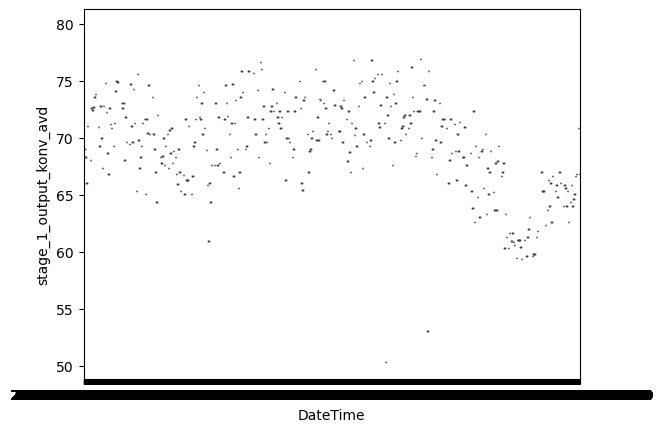

In [123]:
bp = sns.boxplot(x='DateTime', y='stage_1_output_konv_avd', data=df)
#plt.setp(bp.get_xticklabels(), rotation=0)
plt.show()

<Axes: >

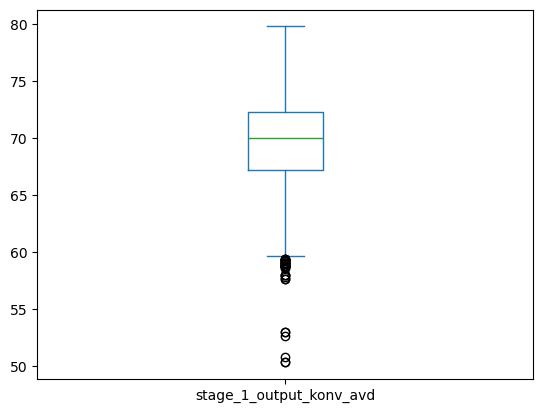

In [35]:
df['stage_1_output_konv_avd'].plot(kind='box')

<Axes: xlabel='stage_4_output_danger_gas'>

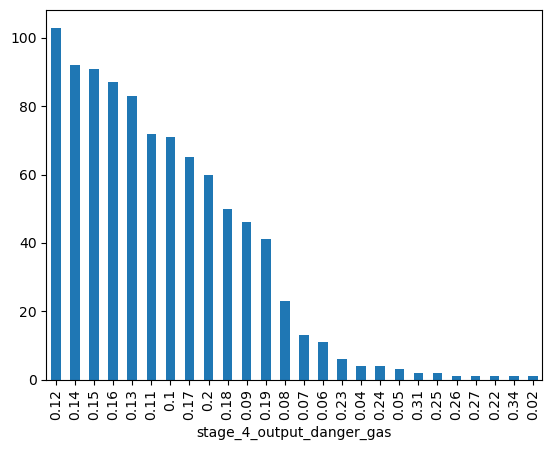

In [144]:
df.stage_4_output_danger_gas.value_counts().plot.bar()